# GPAO I
 Throughout the M\"uller Brown example, we are going to manually perform one image method (OIM) (https://aip.scitation.org/doi/10.1063/1.4986787). Where we optimize the pathway using minimum calculation of actual potential.


## Previously on Muller Brown II



In [1]:
import numpy as np
from taps.paths import Paths
from taps.models import MullerBrown
from taps.coords import Cartesian
from taps.visualize import view

from taps.projectors import Sine
# We are going to use only the 30% of the coordinate information

N = 300

x = np.linspace(-0.55822365, 0.6234994, N)
y = np.linspace(1.44172582, 0.02803776, N)

coords = Cartesian(coords=np.array([x, y]))

Nk = N - 270
prj = Sine(N=N, Nk=Nk, 
           init=coords.coords[..., 0].copy(), 
           fin=coords.coords[..., -1].copy())

from taps.pathfinder import DAO

action_kwargs = {
    'Onsager Machlup':{    
        'gam': 1.,
    },
    'Energy Restraint':{
        'muE': 1.,
        'Et': -0.45
    }
}

search_kwargs = {"method":"L-BFGS-B"}

finder = DAO(action_kwargs=action_kwargs,
             search_kwargs=search_kwargs, 
             prj=prj)

from taps.db import ImageDatabase
imgdb = ImageDatabase(filename="mullerbrown.db")



from taps.models.gaussian import Gaussian, Likelihood

model = MullerBrown()
model = Gaussian(real_model=model)

paths = Paths(coords=coords, model=model, finder=finder, imgdb=imgdb)

def regression(model, database):
    from scipy.optimize import minimize, Bounds
    loss_fn = Likelihood(kernel=model.kernel, mean=model.mean, database=database, kernel_prj=model.prj)
    x0 = model.kernel.get_hyperparameters()
    # sigma_f, l^2, sigma_n^e, sigma_n^f
    bounds = Bounds([1e-2, 1e-2, 1e-5, 1e-6], [5e1, 1e2, 1e-2, 1e-3])
    res = minimize(loss_fn, x0, bounds=bounds, method='L-BFGS-B')
    model.set_lambda(database, Θk=res.x)

paths.add_image_data(index=[0, coords.N//3, -1])
regression(model, imgdb)

paths.search()


      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    214    228    228   4.2666   0.0026
Converge :    216    233    233   4.2666   0.0009
sigma_f    : 0.45452207582059223
l^2        : 0.13414723951840832
sigma_n^e  : 0.01
sigma_n^f  : 0.001
            Results
 Onsager Machlup             : 1.5902756581396034
 Energy Restraint            : 2.676320206337108
 Total S                     : 4.266595864476711


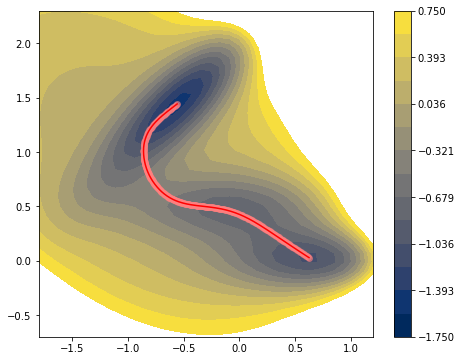

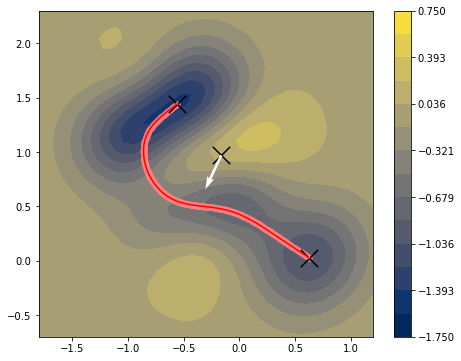

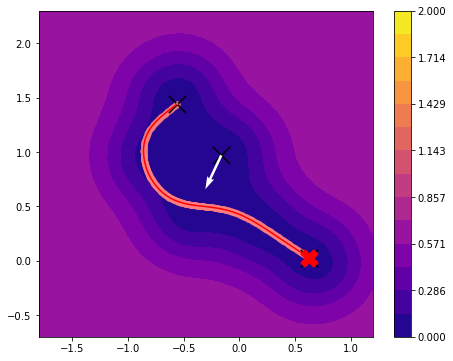

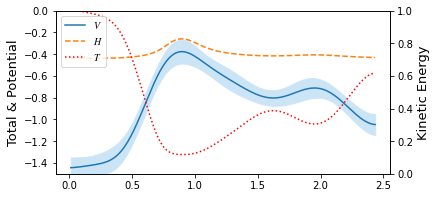

In [2]:
view(paths, viewer='MullerBrown', gaussian=True)

In [3]:
paths.model.kernel.hyperparameters

{'sigma_f': 0.45452207582059223,
 'l^2': 0.13414723951840832,
 'sigma_n^e': 0.01,
 'sigma_n^f': 0.001}

## One Image Method

Process of OIM is following 
1. Optimization on Gaussian PES
2. Add data having maximum uncertainty

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    362    387    387   3.8468   0.0006
Converge :    363    390    390   3.8468   0.0005
sigma_f    : 0.49029538903014325
l^2        : 0.14898877667255012
sigma_n^e  : 1e-05
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.6656457937478337
 Energy Restraint            : 2.181139581453605
 Total S                     : 3.846785375201439


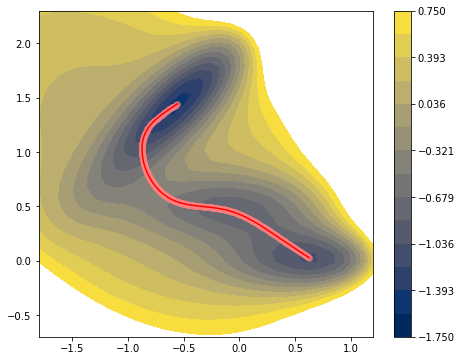

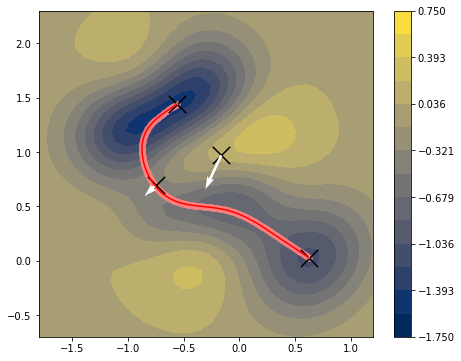

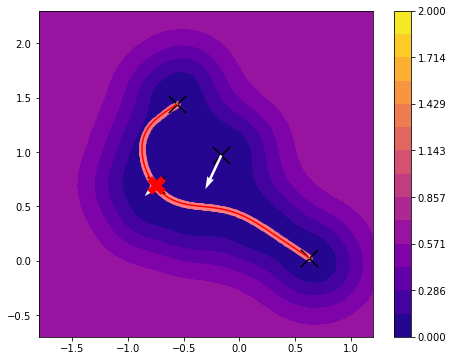

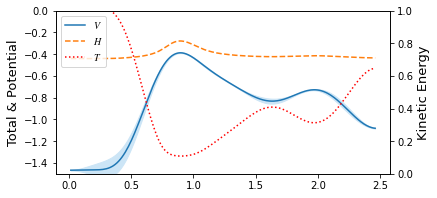

In [4]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)

paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

In [5]:
paths.get_image_data()['coords'].shape

(2, 4)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    506    545    545   3.4098   0.0004
Converge :    507    549    549   3.4098   0.0005
sigma_f    : 0.4100187067641523
l^2        : 0.1240577310239753
sigma_n^e  : 0.0010712741108433396
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.3745803296278385
 Energy Restraint            : 2.035227837789744
 Total S                     : 3.409808167417583


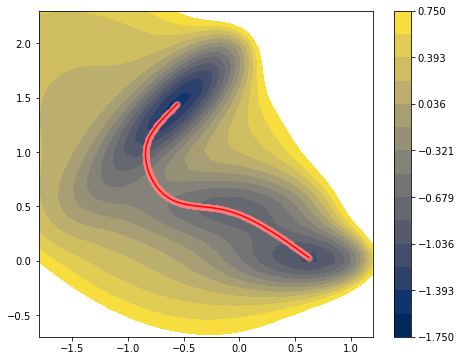

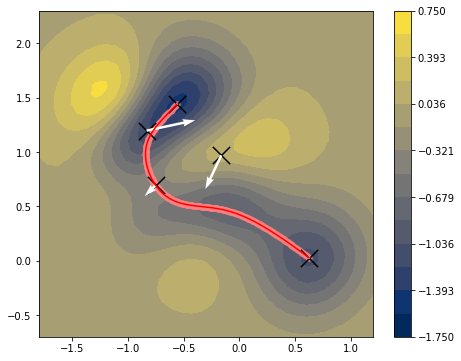

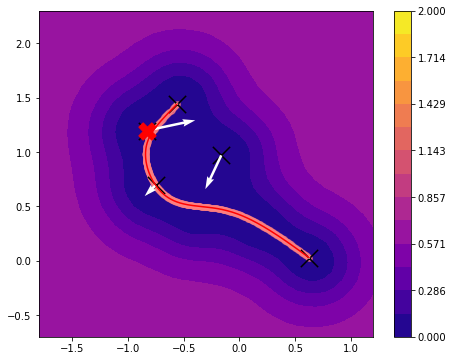

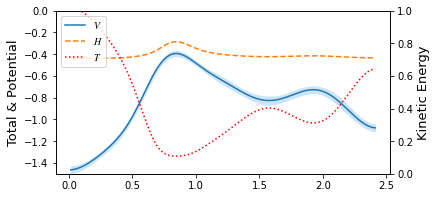

In [6]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    645    696    696   3.6544   0.0028
Converge :    647    701    701   3.6544   0.0003
sigma_f    : 0.4620667018850567
l^2        : 0.12462134653449422
sigma_n^e  : 0.0003429684156254419
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.4506377360925478
 Energy Restraint            : 2.2037242595406754
 Total S                     : 3.654361995633223


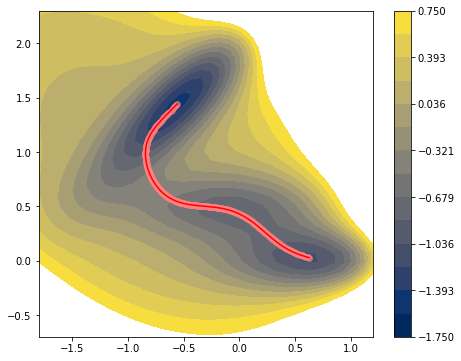

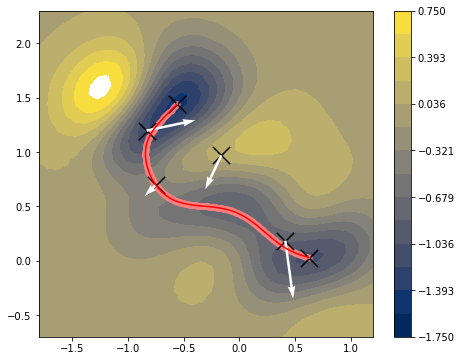

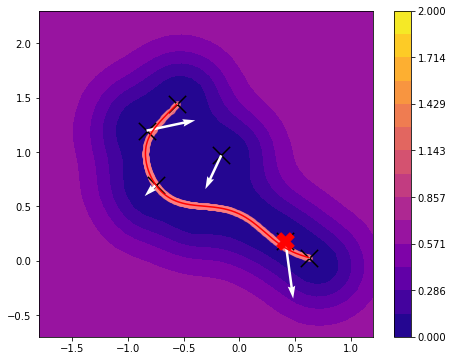

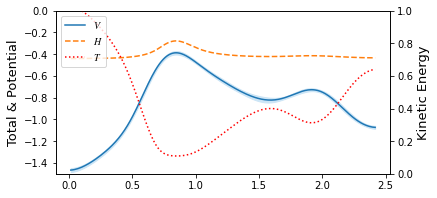

In [7]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    777    844    844   3.7183   0.0003
Converge :    779    849    849   3.7183   0.0004
sigma_f    : 0.5122001551094404
l^2        : 0.12584282874621344
sigma_n^e  : 1e-05
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.4414477749271988
 Energy Restraint            : 2.276855991681529
 Total S                     : 3.718303766608728


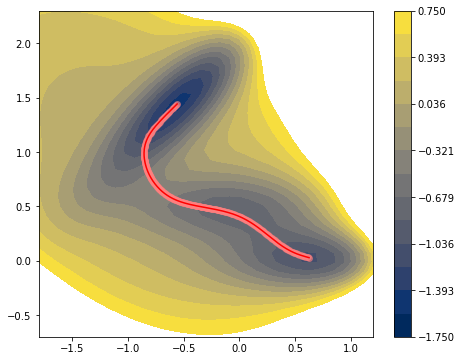

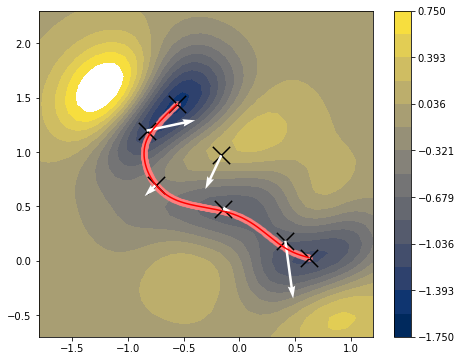

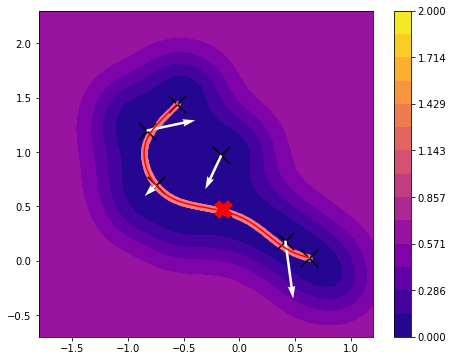

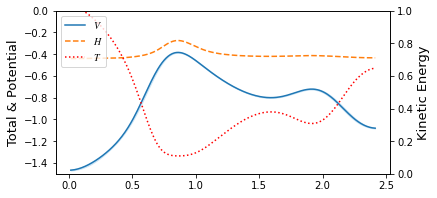

In [9]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    888    966    966   3.6901   0.0021
Converge :    890    971    971   3.6901   0.0004
sigma_f    : 0.5121576185980149
l^2        : 0.12949987110590636
sigma_n^e  : 1e-05
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.450102187961181
 Energy Restraint            : 2.239997702571689
 Total S                     : 3.69009989053287


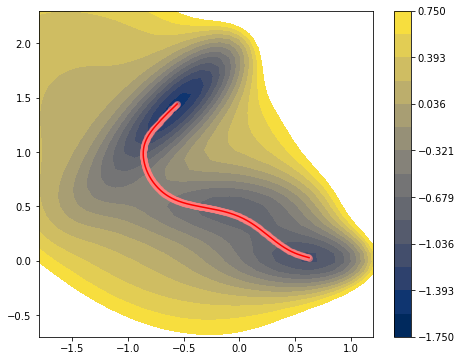

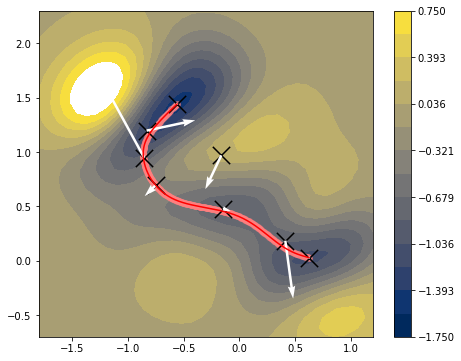

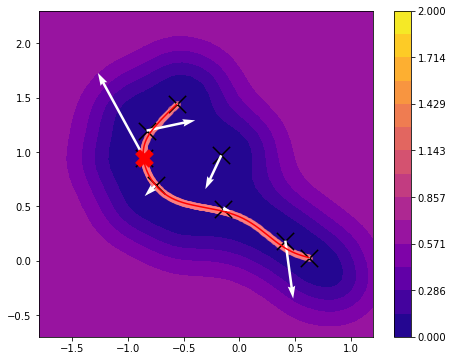

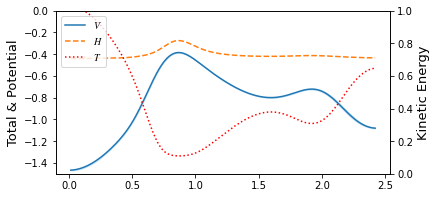

In [10]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :    975   1063   1063   3.6818   0.0007
Converge :    976   1067   1067   3.6818   0.0005
sigma_f    : 0.5121200975321321
l^2        : 0.1306325904708511
sigma_n^e  : 1e-05
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.4462930915087449
 Energy Restraint            : 2.2355487978873017
 Total S                     : 3.6818418893960465


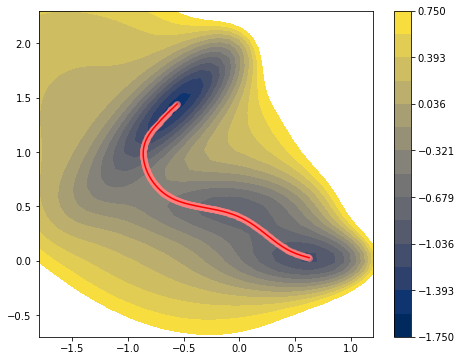

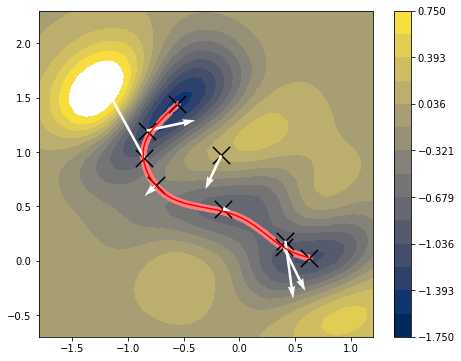

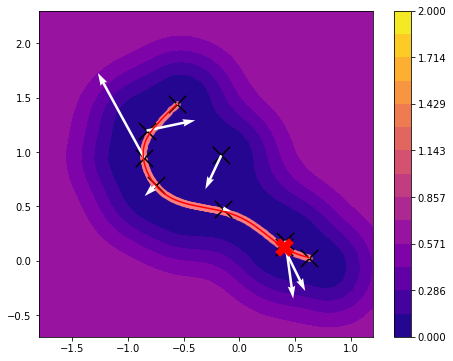

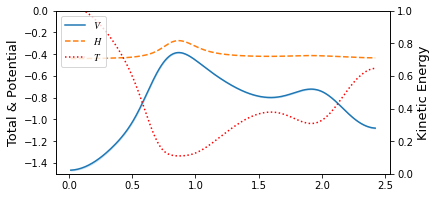

In [11]:
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

      DAO Parameters
Onsager Machlup
  gam        : 1.0  
 
Energy Restraint
  muE        : 1.0  
  Et         : -0.45
 
            Iter   nfev   njev        S   dS_max
Converge :   1626   1738   1738   3.6967   0.0042
Converge :   1628   1744   1744   3.6967   0.0027
sigma_f    : 0.4654496083584296
l^2        : 0.12700349507755296
sigma_n^e  : 1e-05
sigma_n^f  : 1e-06
            Results
 Onsager Machlup             : 1.4506532663124063
 Energy Restraint            : 2.246054655203848
 Total S                     : 3.6967079215162544


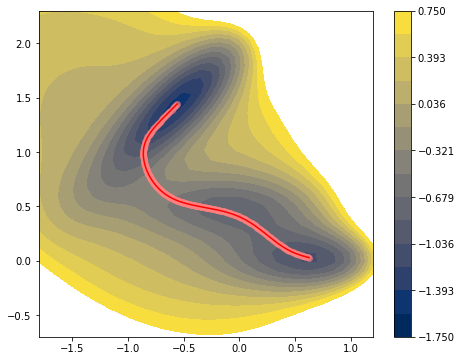

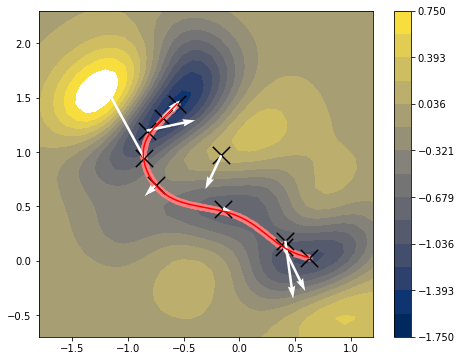

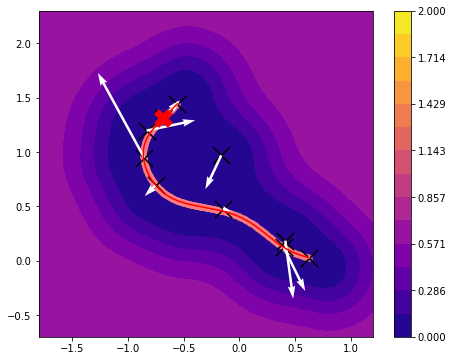

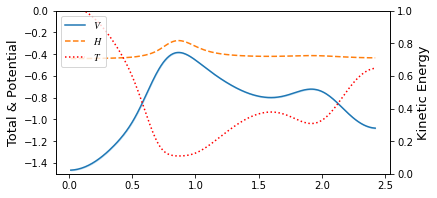

In [12]:
paths.finder.real_finder.prj.Nk = N - 2
most_uncertain_idx = np.argmax(paths.get_covariance())
paths.add_image_data(index=[most_uncertain_idx])
regression(model, imgdb)
paths.search()
view(paths, viewer='MullerBrown', gaussian=True)

You can see the process of pathway being optimized throughout iteration. 